# Supervised Learning Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Gather data, determine the method of data collection and provenance of the data

I obtained the heart disease dataset from kaggle here: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv

In [18]:
df = pd.read_csv('data/heart.csv')

### Step 2: Identify a Supervised Machine Learning Problem

From Kaggle: This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

My initial understanding of this dataset is that the dataset allows one to predict heart disease in an individual based on various medical attributes. It will be a classification problem where the goal is to identify whether someon has heart disease or not.

- Type of learning: This project will allow me to apply the supervised learning techniques as the dataset is labeled and has a target variable.
- Type of Task: The type of task will be binary classification as the goal is to predict whether someone has heart disease or not.

This dataset has a lot of numerical values and is therefore a great dataset to use for Logistic Regression. Logistic regression requires labeled dataset to learn and make predictions. The target variable in particular has boolean values and therefore Logistic regression is great as it's a binary classiciation algorithm.

The goal of the project is to predict the presence of heart disease in patients. The "target" field in the dataset is the key attribute that indicates whether a patient has heart disease or not. The values are binary: 0 stands for "no disease" and 1 stands for "disease."

### Step 3: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

#### Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.

The features of this dataset are:
1. age: age in years
2. sex: 1 = male; 0 = female
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: whether someone has heart disease or not

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


From the information column, there seem to be no null values, with most columns being integeres and only 'oldpeak' being a float. There are a total of 14 columns. Therefore, it has a shape of (1025,14)

In [23]:
# Find the min and max values using describe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
# Find out the number of missing rows per column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Describe correlations between different factors of the dataset and justify your assumption that they are correlated or not correlated. You may use numeric or qualitative/graphical analysis for this step.

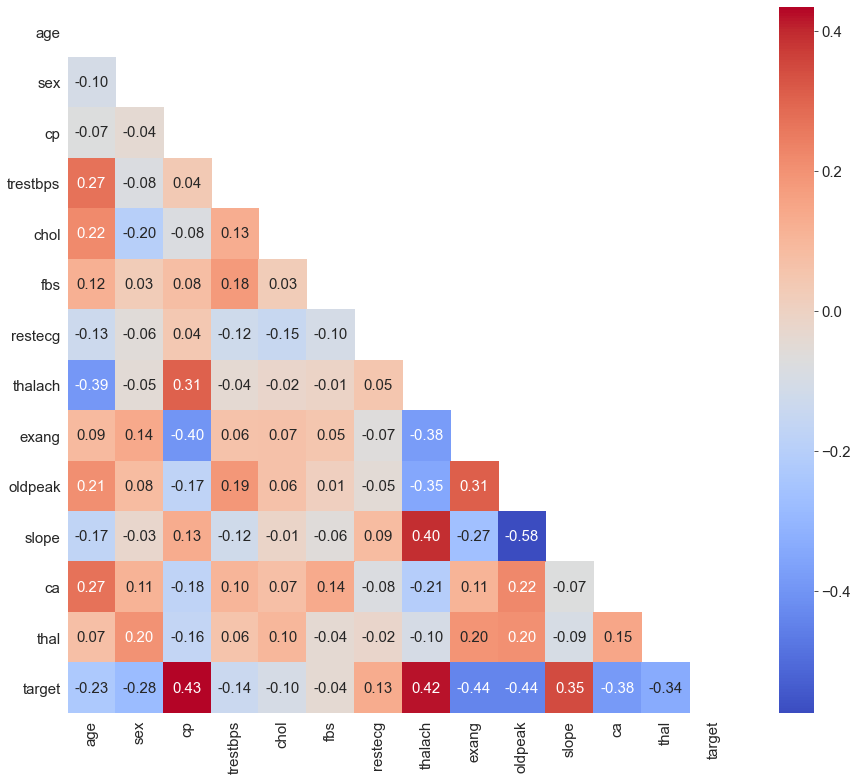

In [52]:
# heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(df.corr()))
plt.rcParams['font.size'] = 15

plt.show()

Based on the correlation matrix, it seems that the following features have a positive correlation with target:
- target and cp
- target and thalach
- target and slope

The following features seem to be correlation with each other (collinearity):
- thalack and slope

The following features have a nevative correlation with target:
- target and exang
- target and oldpeak
- target and ca
- target and thal

#### Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of the data.

I will be considerting a log of the features in order to transform the data.

In order to better understand multicollinearity, the **Variance Inflation Factor (VIF)** will be useful as if there is no multicollinearity, the VIF should be 1; while values higher than 5 indicate high collinearity.

In [53]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)

age         38.882441
sex          3.792920
cp           2.566095
trestbps    57.978546
chol        26.208367
fbs          1.272173
restecg      2.073125
thalach     47.110371
exang        2.111290
oldpeak      3.182085
slope        9.990892
ca           1.960731
thal        17.183907
target       4.108633
dtype: float64

As can be seen above, all variables have a VIF greater than 1. Next, I will also look at correlations between the x variables and the y variable.

In [54]:
# Let's only look at the correlations with the y variable:
df_target = df.corr()
df_target['target'].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

The variable which correlates with target the most is `cp`, as was observed in the heatmap. Other notable ones are thalack, and slope.

It should be noted that oldpeak, exang, and ca have a negative correlation.

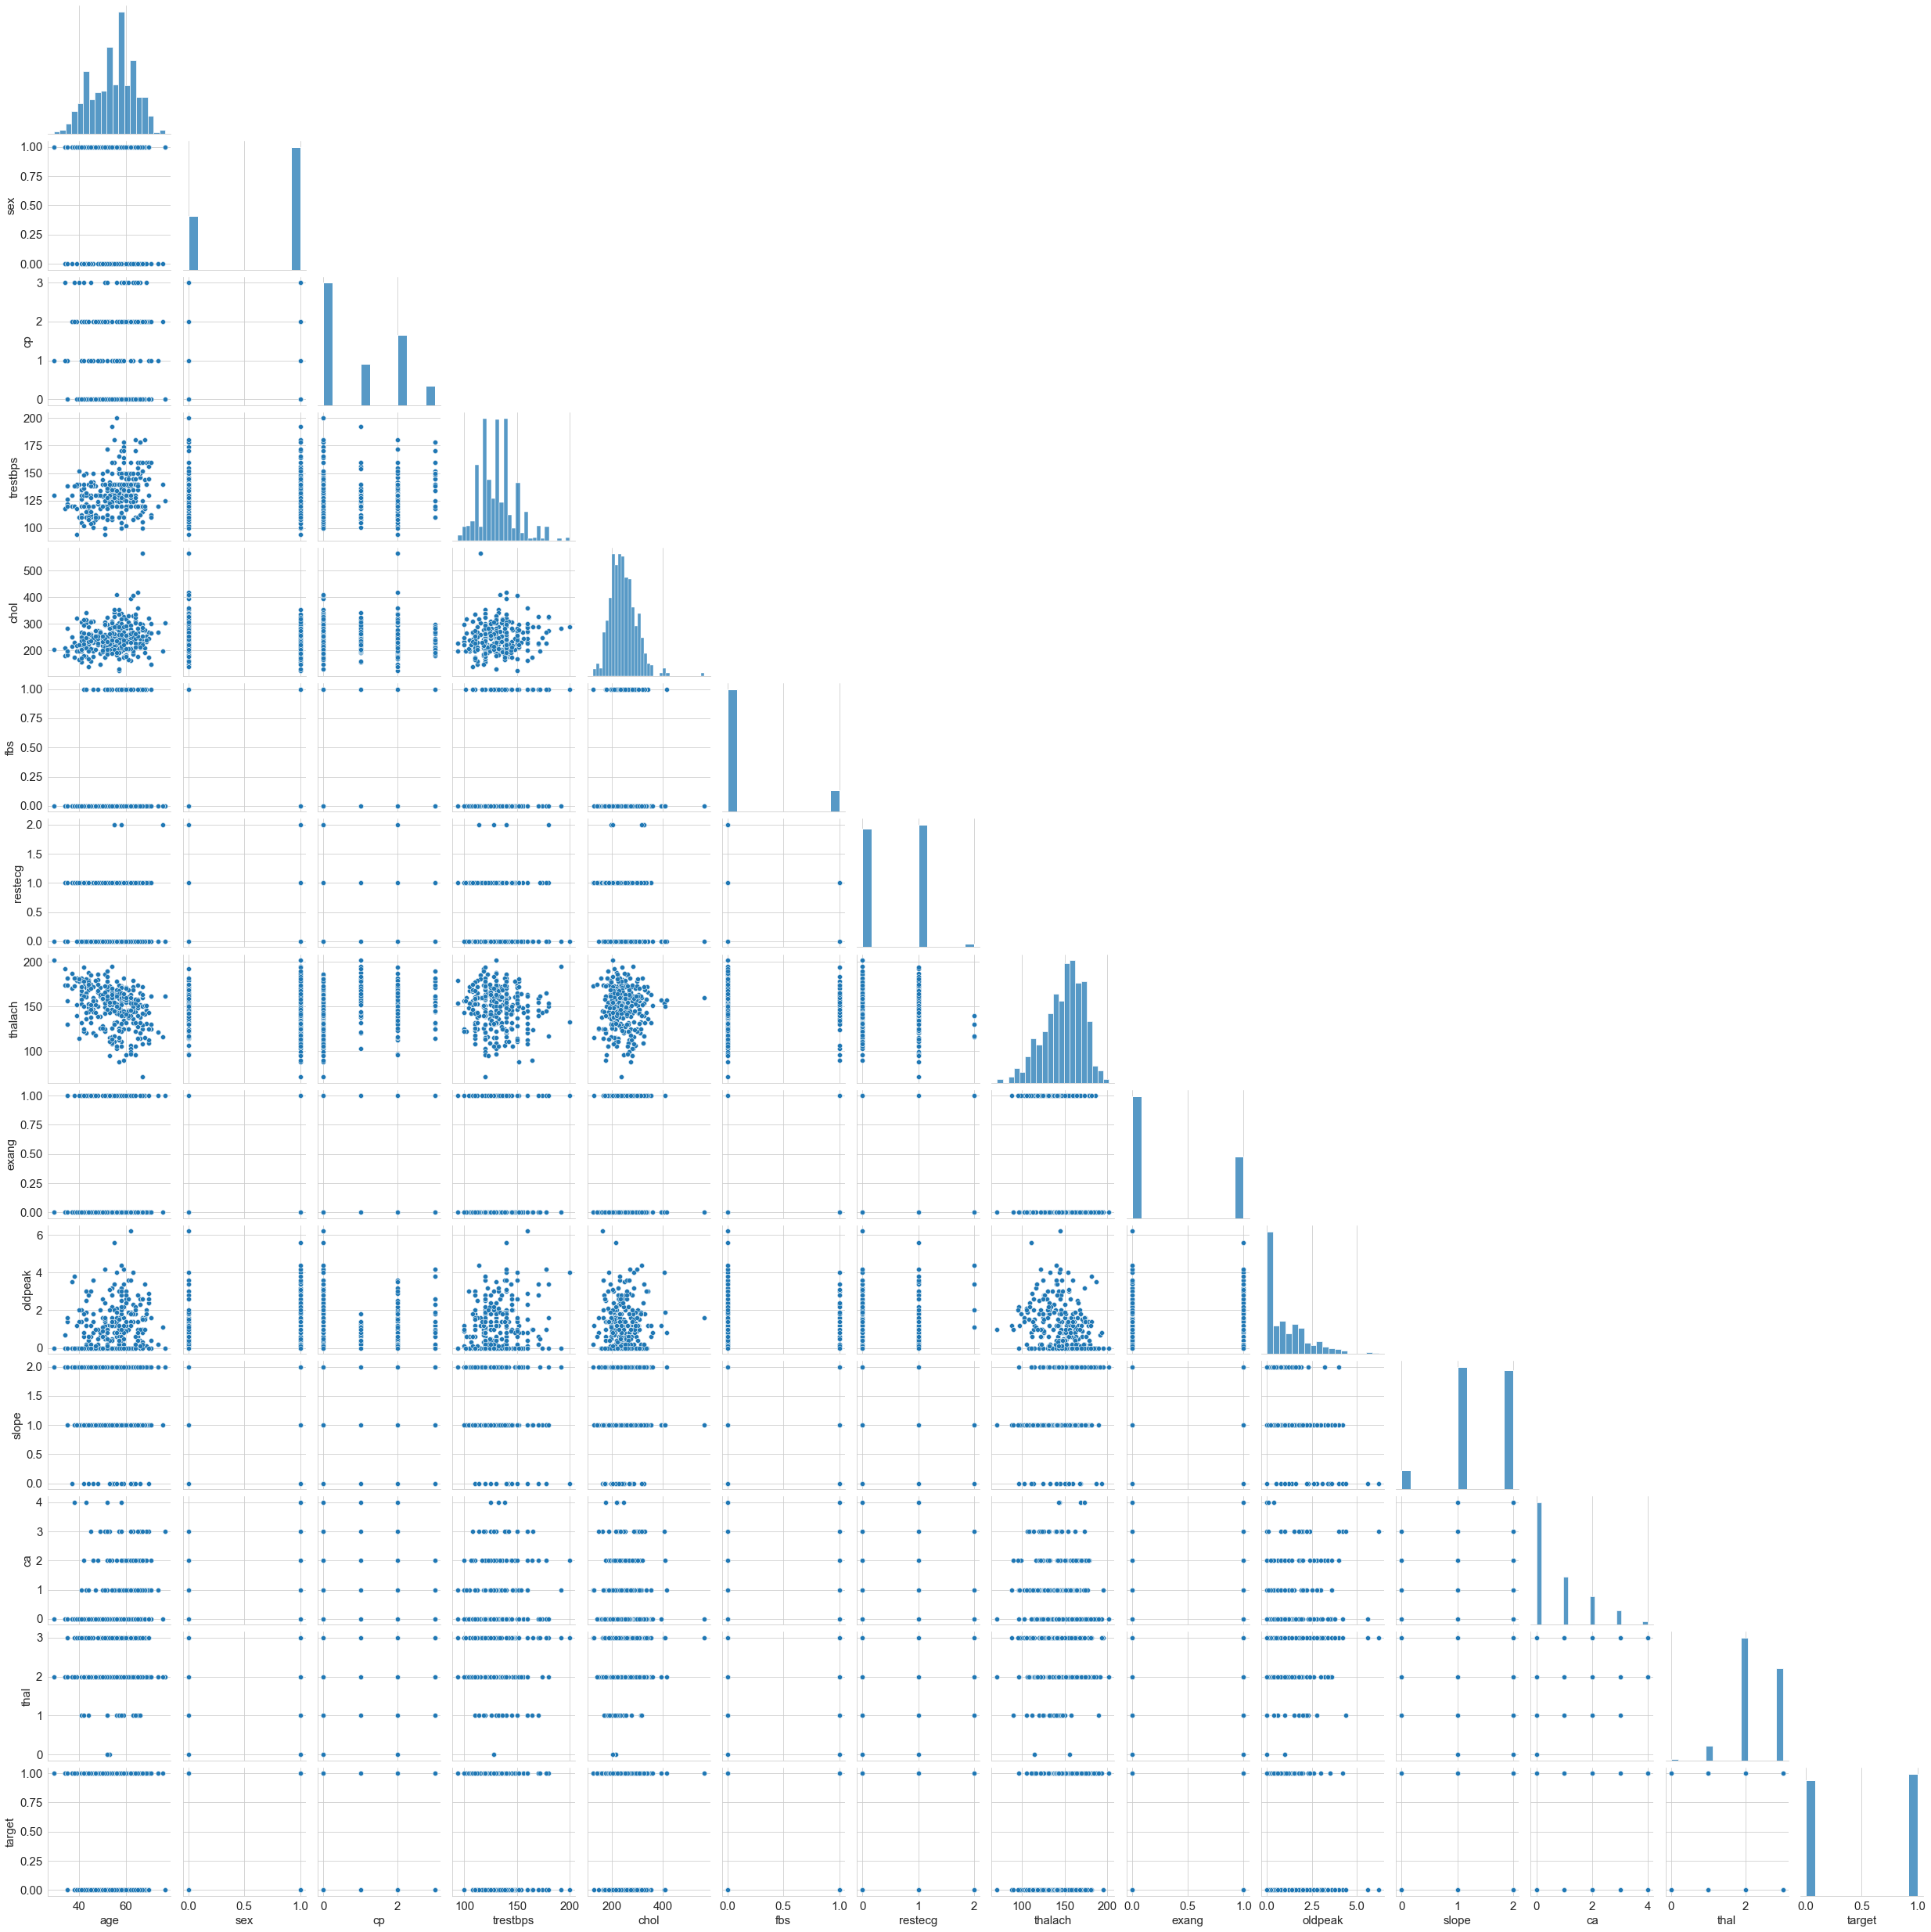

In [56]:
# Use seaborn pairplot to look for collinearity in X variables
sns.pairplot(df, corner=True)
plt.show()

#### Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.

I will be doing a log transform now.

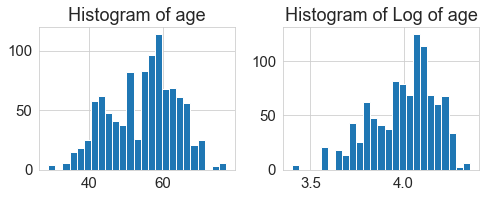

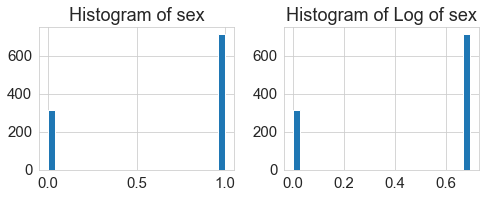

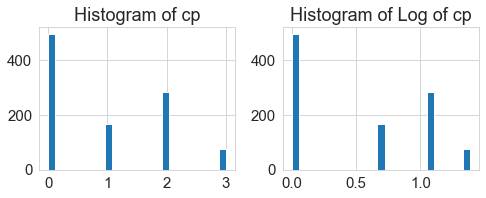

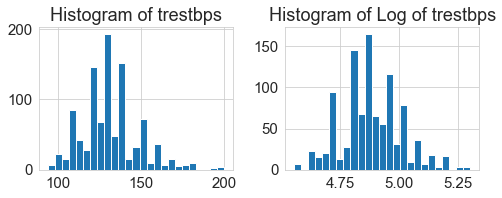

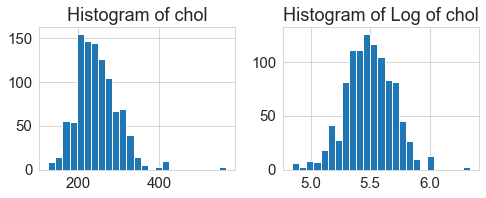

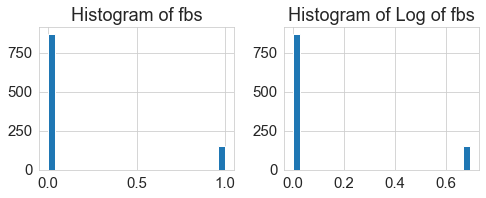

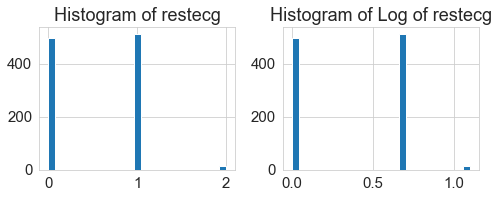

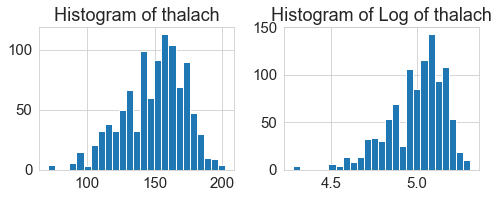

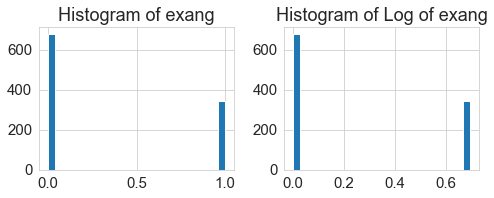

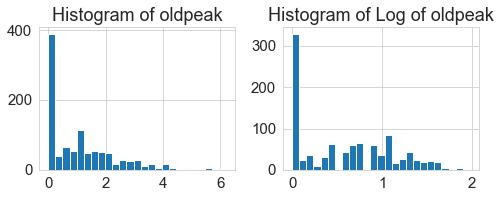

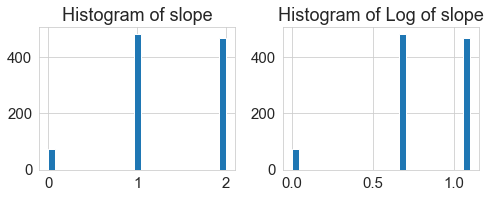

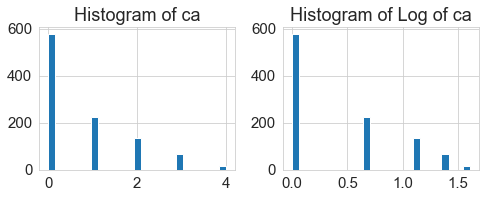

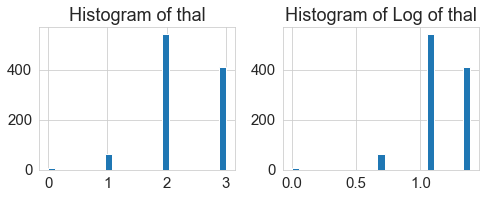

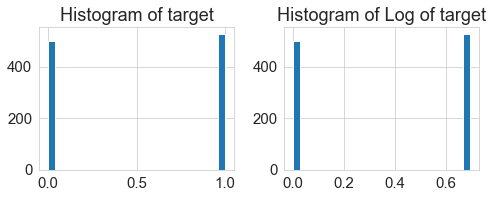

In [62]:
df2 = np.log(df+1)
for column in df.columns:
    
    plt.subplots(1,2, figsize=(7,3))
    
    # plot original hist
    plt.subplot(1,2,1)
    plt.hist(df[column], bins=25)
    plt.title(f'Histogram of {column}')
    
    # plot transformed hist
    plt.subplot(1,2,2)
    plt.hist(df2[column], bins=25)
    plt.title(f'Histogram of Log of {column}')
    
    plt.tight_layout()
    plt.show()

After applying log, it seems that some of the features have a better normal distribution such as cholestrol but overall, there is not a huge difference.

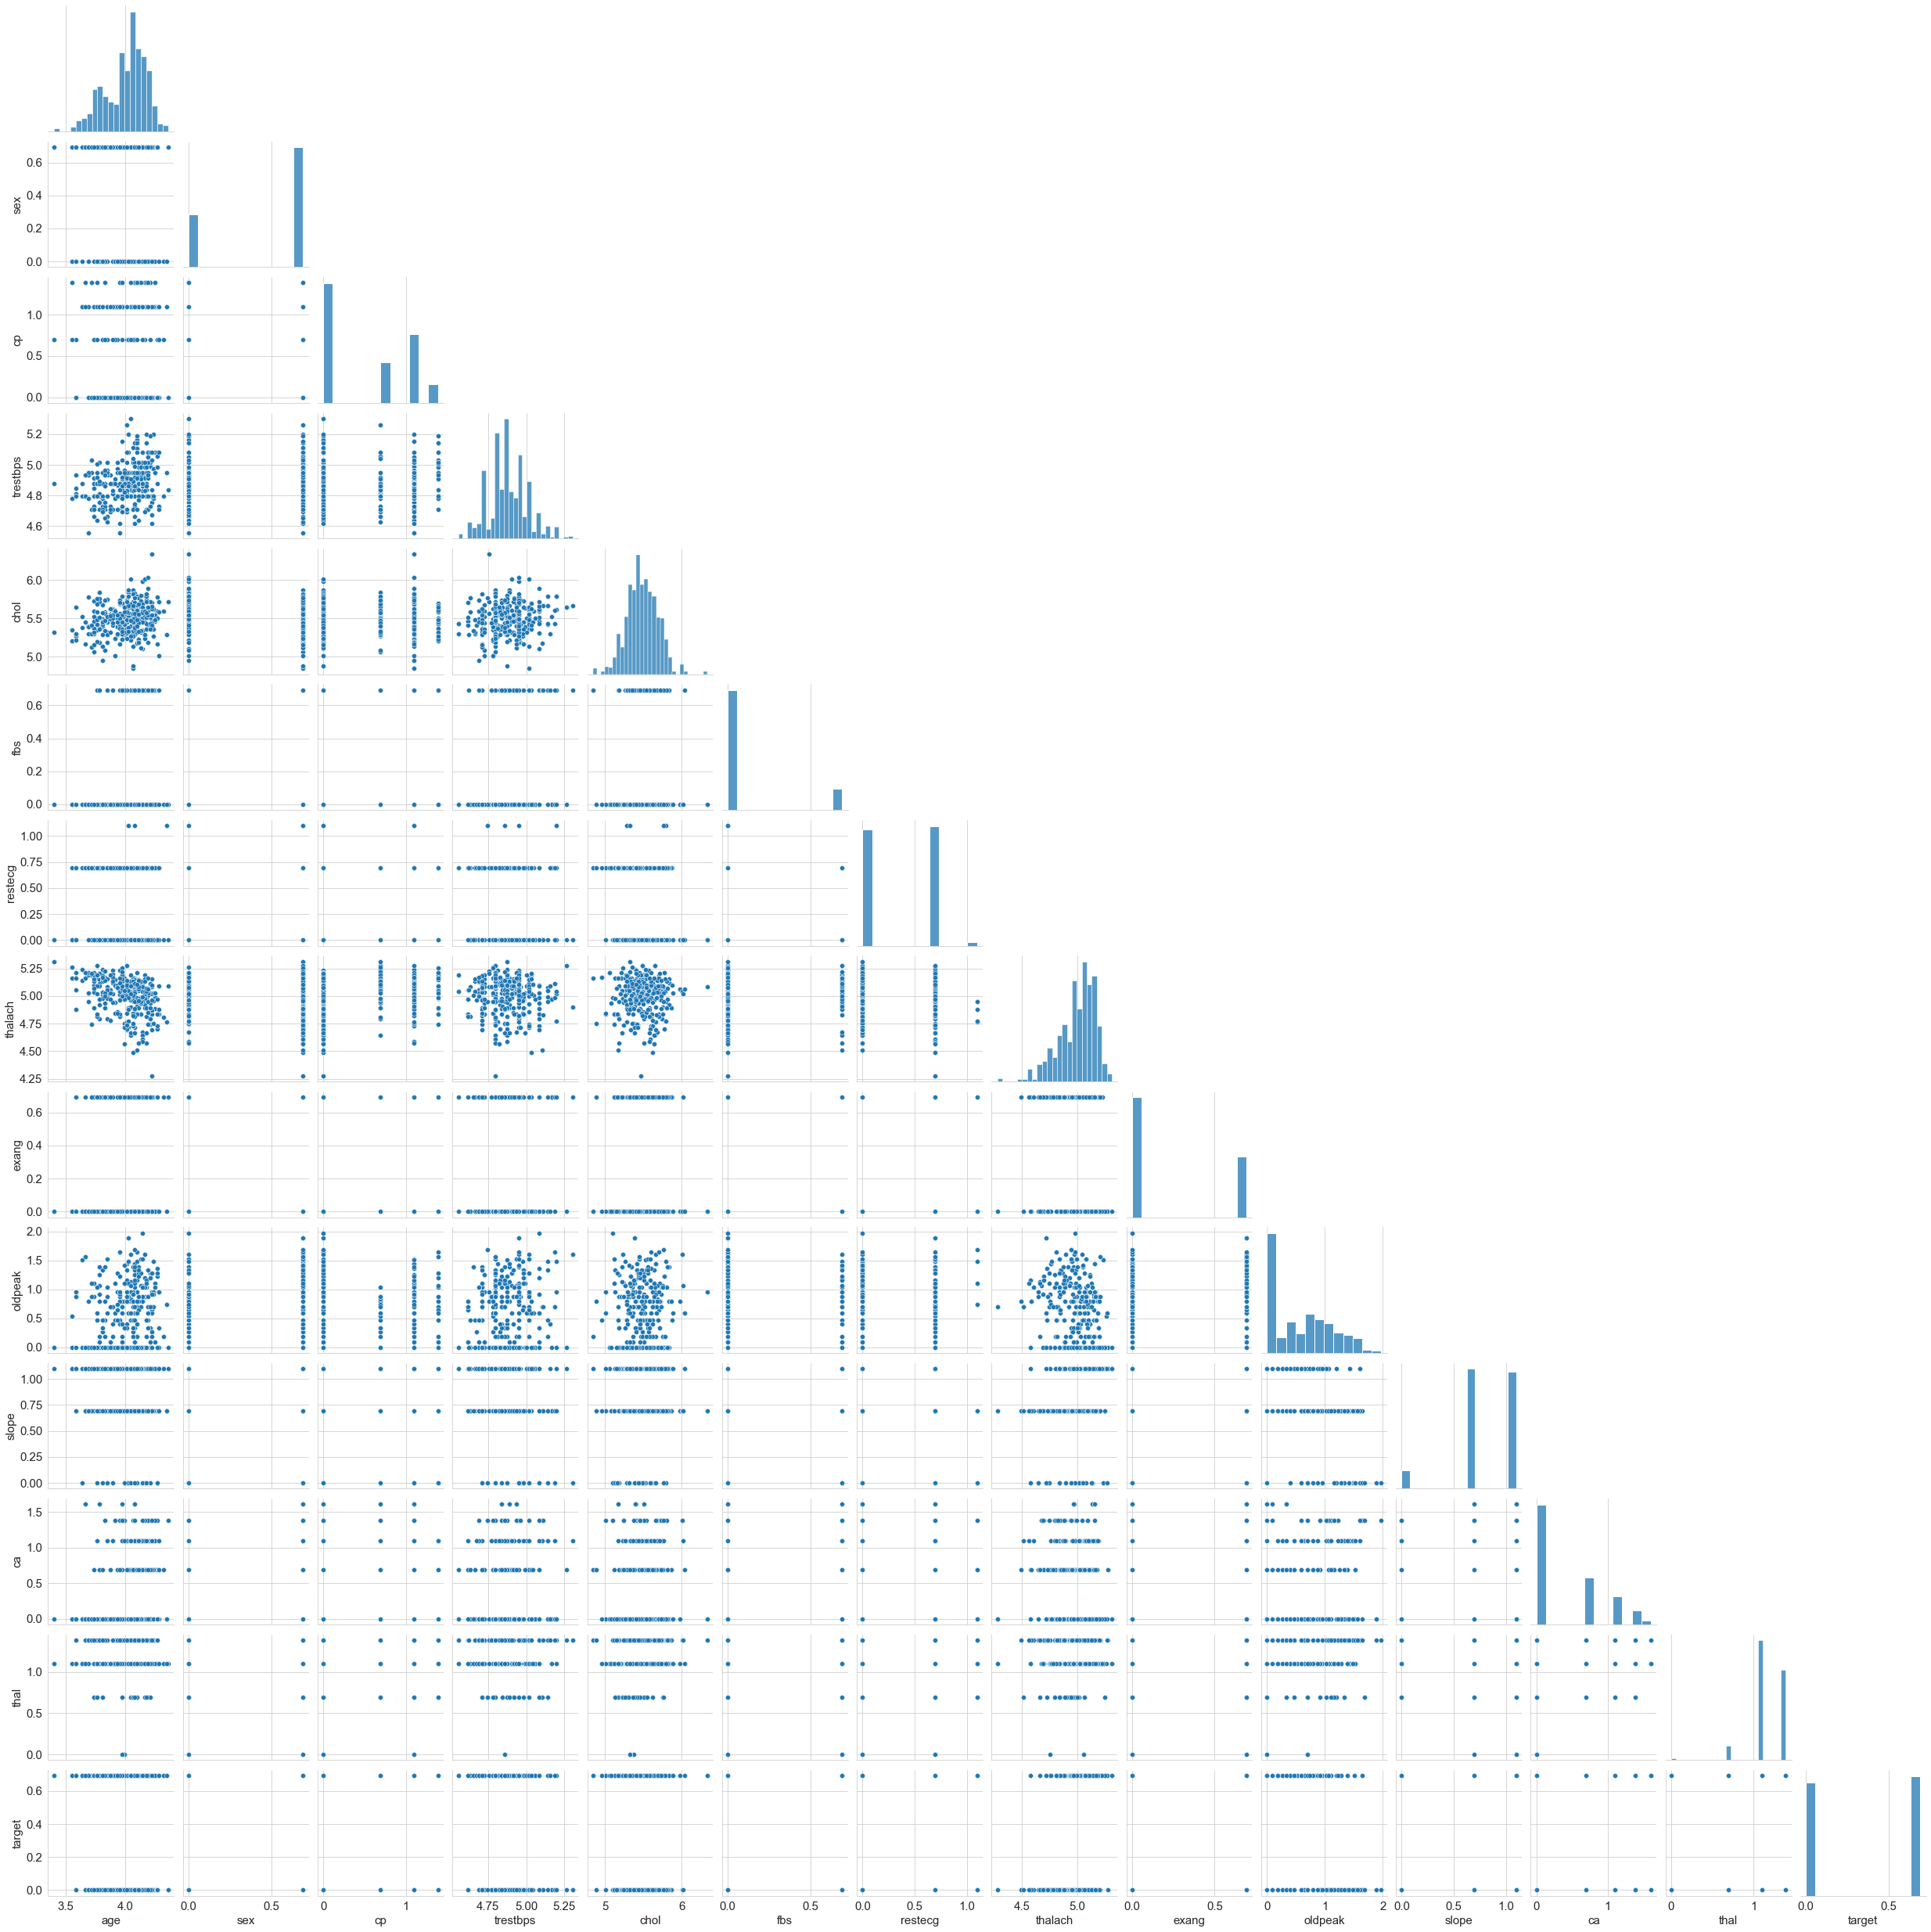

In [65]:
# looking at pairplot again:
sns.pairplot(df2, corner=True)

#### You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?

The data has no missing values and does not require interpolation or substitution.

#### If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.

Based on the correlation matrix, the variable `cp` might be the most important as compared to others.

### Step 4: Perform Analysis Using Supervised Machine Learning Models of your Choice, Present Discussion and Conclusions

In [66]:
# assign independent variables to X and y
X = df.drop(columns=['target'])
y = df['target']

In [68]:
from statsmodels.regression import linear_model

# fit the first linear model
linreg1 = linear_model.OLS(y, X).fit()
linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              242.0
Date:                Mon, 21 Aug 2023   Prob (F-statistic):                   1.71e-299
Time:                        16:15:36   Log-Likelihood:                         -388.29
No. Observations:                1025   AIC:                                      802.6
Df Residuals:                    1012   BIC:                                      866.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0027      0.001      2.185      0.029       0.000       0.005
sex           -0.1794      0.025     -7.084      0.000      -0.229      -0.130
cp             0.1103      0.012      8.984      0.000       0.086       0.134
trestbps      -0.0004      0.001     -0.667      0.505      -0.002       0.001
chol          -0.0002      0.000     -0.931      0.352      -0.001       0.000
fbs           -0.0110      0.032     -0.339      0.735      -0.075       0.053
restecg        0.0681      0.021      3.199      0.001       0.026       0.110
thalach        0.0050      0.000     10.353      0.000       0.004       0.006
exang         -0.1178      0.028     -4.273      0.000      -0.172      -0.064
oldpeak       -0.0566      0.012     -4.586      0.000      -0.081      -0.032
slope          0.0861      0.023      3.744      0.000       0.041       0.131
ca            -0.0998      0.012     -8.478      0.000      -0.123      -0.077
thal          -0.0996      0.019     -5.275      0.000      -0.137      -0.063
==============================================================================
Omnibus:                       23.420   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.399
Skew:                          -0.366   Prob(JB):                     5.03e-06
Kurtosis:                       2.811   Cond. No.                         963.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""